# Laboratorio SPICE

Borja Rullán Terrazas

## 1. Introducción

Para la realización de este ejercicio vamos a trabajar con SPICE, método estándar para la descripción de circuitos a partir de texto plano. 

A continuación se enumeran diferentes interpretes de SPICE, todos ellos desarrollados 
a partir del original de la Universidad de Berkeley. De hecho, desde la página oficial de la universidad encontramos algunos ejemplos.  

| Intérprete | Licencia    | Fabricante         | Características                  |
|------------|-------------|--------------------|----------------------------------|
| Ahkab      | GPL         | Giuseppe Venturini | Basado en Python                 |
| HSPICE     | Comercial   | Avant!             | Versión comercial, más robusta   |
| SPICE3     | BSD license | Berkeley           | Corre sobre plataformas UNIX     |
| ngspice    | BSD license |                    | Basado en SPICE3, Cider1 y Xspice|



### 1.1 Características de SPICE

A la descripción de texto plano que define el circuito se le llama netlist, algunos de los elementos básicos que lo componen son:

- Comentarios, que empiezan con el símbolo *
- Dispositivos básicos ( _V_ para fuentes de alimentacion, _R_ para resistencias, _C_ para condensadores y _L_ para bobinas)
- Puntos de union. Se utilizan normalmente numeracion secuencial. El único criterio que hay que seguir es que en el caso de una fuente de alimentación el nodo que pongamos primero será el que se encuentre más cerca del borne positivo.
- SPICE utiliza siempre las unidades del Sistema Internacional y no hay que hacer referencia a las mismas. Se pueden utilizar múltimplos utilizando _K_ para kilo, _m_ para mili y _u_ para micro. 
- Para las fuentes de alimentacion hay que especificar si se trata de corriente continua o alterna.
- El final del circuito se especifica con el comando .estándar

Las unidades del Sistema Internacion relacionadas con la asignatura y con los circuitos en general que conozco son: 

| Unidad     | Símbolo  | Descripción                             | 
| ---------- | -------- | ----------------------------------------| 
| Voltios    | _V_      |  Potencial electrico                    | 
| Amperios   | _A_      | Intensidad                              | 
| Ohmios     | _Ω_      | Resistividad                            |
| Faradios   | _F_      | Capacidad, Unidad compuesta: A*/V       |
| Julios     | _J_      | Energia                                 |
| Culombios  | _C_      |  Carga electrica. 1 A * 1 s             |

### 1.2 Realización de análisis con SPICE

SPICE no solo permite la descripción del circuito sino también la realización de análisis sobre el mismo.  Los principales comandos de simulación son: 

- _.op_ :Devuelve voltaje e intensidad en cada rama y componente del circuito. 
- _.dc_ :Devuelve voltaje e intensidad en cada rama y componente del circuito pero nos permite cambiar el valor de voltaje de una fuente de alimentación en pasos consecutivos.
- _.tran_ :Permite realizar un análisis en el tiempo de los parametros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero. 

A SPICE lo catalogaría dentro de de los lenguajes de programación orientados a objetos, ya que podríamos considerar una netlist como una instancia de un objeto circuito que tiene unas caracteristicas asociadas, que a su vez está compuesto de otras entidades (elementos básicos) y que tienen unas funciones (análisis), que tienen como parámetros de entrada los valores del netlist.

Por otro lado, los valores que puede tener el parámetro _uic_ son:

- _uic=0_: all node voltages and currents through v/h/e/sources will be assumed to be zero at t =tstart
- _uic_=1: la situación en ‘t = tstart es el último resultado del análisis OP.
- _uic_=2: the status at t=tstart is the last result from a OP analysis on which are set the valuesof currents through inductors and voltages on capacitors specified in their ic. This is done very roughly, checking is recommended.
- _uic_=3: Load a user supplied ic. This requires a .ic directive somewhere in the netlist and a ic‘s name and ic_label must match.


## 2. Trabajo práctico

Los primeros pasos tienen que ver con la importación de Ahkab, que es el interprete de SPICE sobre Python que vamos a utilizar. 

Me quedan pendientes estas dos preguntas.

Pregunta: Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. Aquí tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).

Pregunta: Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

Lo único que tenemos que hacer es importar las distintas librerias:



In [46]:
import pylab as plt
import ahkab
import sympy as py

Pregunta: ¿Qué es y para qué sirve PyLab?




## 2.1 Introducción Ley de Ohm

La Ley de Ohm indica que el voltaje que se disipa en un tramo de circuito es equivalente  a intensidad de la corriente ( cuantos electrones circulan por unidad de tiempo) por la resistencia del material en que se está desplazando es la misma. 

$$V = I*R$$

Como veremos a continuación la Ley de Ohm está  ajustada a nivel dimensional, es decir, la naturaleza de lo que está a ambos lados del signo igual es la misma.

Cuando una pila se conecta a dos metales, provoca que las cargas comiencen a viajar desde uno al otro, hasta que la diferencia de potencial se equipara al de la batería.

La transferencia de carga es proporcional al voltaje de la bateria, a la constante de proporcionalidad se le llama capacidad (_C_)

$$q = C*V$$

Por otro lado, la intensidad representa la tasa de cambio de la carga con el tiempo 

$$I=\frac{d}{dt}*q$$

Por lo tanto si volvemos a la Ley de Ohm

$$V = I*R$$

y sustituimos a ambos lados por los resultados obtenidos anteriormente tendremos

$$\frac{q}{C}=\frac{d}{dt}*q*R$$

Es decir, todo esta relacionado con las cargas y su viaje a traves del conductor, incorporando dos factores de proporcionalidad como son la capacidad (_C_) y la resistencia (_R_).




## 2.2 Circuito sencillo


Comenzamos a pintar el circuito más sencillo posible de todos a partir de la descripción obtenida en el enunciado de la actividad

In [9]:
%%writefile "circuito sencilloBRT.sp"
Circuito sencillo
r1 1 0 100
* una pila de 9 voltios en corriente continua
v1 0 1 type=vdc vdc=9
*empiezan los comando para realizar el análisis sobre el circuito
.op
*variamos el valor del voltaje desde 0 hasta 9 en pasos de 1 voltio
.dc v1 start=0 stop=9 step=1
* el fin de la descripción se especifica con el comando.end
.end

Overwriting circuito sencilloBRT.sp


Ahora vamos a leer la descripción del fichero con Ahkab, para a partir de ahí interpretar y ejecutar el análisis del circuito. Los resultados los vamos a volcar en la variable _lista_de_analisis_, que es una estructura tipo _list_ en Python. 

In [10]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito sencilloBRT.sp')


In [11]:
circuito = circuito_y_analisis [0]
analisis = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis)
print(lista_de_analisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


Las simulaciones que tendrán listas de datos, es decir, todas ellas que no son.op, necesitan de un fichero temporal donde almacenar los resultados. Con este código identificamos que listas de análisis son del tipo _.dc_ o _.tran_ y añadimos la propiedad outfile en este caso. 



In [12]:

indexdc=0
indextran=0
for i in lista_de_analisis:
    if i['type']=="dc": 
        indexdc=lista_de_analisis.index(i)
    if i['type']=="tran": 
        indextran=lista_de_analisis.index(i)   

if indexdc>0:
    lista_de_analisis[indexdc]['outfile'] = "simulacionBRT dc.tsv"

if indextran>0:
    lista_de_analisis[indextran]['outfile'] = "simulacionBRT tran.tsv"


Comprobamos que el código anterior ha funcionado en el caso de dc, que es el que aplica en el ejericio. 



In [13]:
print(lista_de_analisis[1]['outfile'])

simulacionBRT dc.tsv



### 2.2.1 Resultado de la simulación _.dc_

Una vez separados los netlist de las diferentes simulaciones e informado el fichero donde se almacenaran los datos para el análisis _.dc_, ejecutaremos el método _.run_ de Ahkab:

In [16]:
resultados = ahkab.run ( circuito,lista_de_analisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


Vamos a graficar el análisis correspondiente, en concreto vamos a graficar como varía la intensidad en el circuito en función del voltaje V1, que es el que va variando en el análisis _.dc_ entre 0 y 9. Para ello utilizaremos la biblioteca matplotlib.

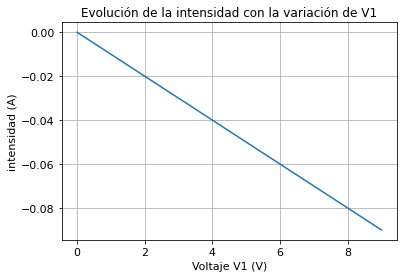

In [31]:


fig, ax = plt.subplots()
ax.plot (resultados['dc']['V1'], resultados['dc']['I(V1)'])

ax.set(xlabel='Voltaje V1 (V)', ylabel='intensidad (A)',
       title='Evolución de la intensidad con la variación de V1')
ax.grid()

plt.show()


Lo que estamos viendo en la gráfica es la variación de la intesidad de corriente a medida que vamos aumentando el voltaje de la pila. Podemos verificarlo a partir de la Ley de Ohm.

$$V = I*R$$ 

o lo que es lo mismo 

$$I=\frac{V}{R}$$

 En este  caso, que _R_ se mantiene fijo en 100 $\Omega$, la intensidad varia en función del valor de _V1_. Por ejemplo si _V1_ es igual a -2 _V_.

$$I=\frac{-2}{100}$$

Que si calculamos

$$I= -0.02A$$

Como se puede observar en la gráfica.


 








### 2.2.1 Resultado de la simulación _.op_

Ahora vamos a realizar el análisis ._op_, pero antes de nada vamos a realizar los cálculos de forma muy simple, _copiando a mano_ los resultados y sin utilizar Sympy para validar la comprensión inicial del ejericio.


In [32]:
v = -9 
r = 100
i= v/ r
print (i, "A")


-0.09 A


Este resultado es el mismo que tendría que salir con el análisis de op, a la que podemos acceder mediante la variable _results_.

In [35]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


Para finalizar vamos a realizar los mismos cálculos utilizando la librería Sympy.

In [52]:

from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

v1 = resultados['op']['V1'][0][0] * volts
r1 = 100*ohms
intensidad = py.symbols('i')
ley_ohm = py.Eq(v1, intensidad*r1)
solucion_para_intensidad = py.solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad

-0.09*ampere


## 2.3 Circuito sencillo con LTspice

Ahora pasamos a la resolución con LTspice siguiendo las instrucciones que vienen en el enunciado de la actividad. 

PENDIENTE DESCRIBIR QUE SIGNIFICAN LAS OPCIONES -ASCII Y -B.


In [4]:
import platform
%alias lts "/Applications/LTspice.app/Contents/MacOS/LTspice" -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

Como vemos a continuación la sintasis es un poco diferente, vamos a registrar de momento un netlist con el análisis _.op_

In [53]:
%%writefile "circuito_sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
.end

Overwriting circuito_sencillo.net


In [54]:
lts "circuito_sencillo.net"

Ejecutamos con LtSpice y podemos comprobar que es el mismo que el anterior.

In [55]:
%pycat circuito_sencillo.log

C i r c u i t :   *   E s t e   e s   u n   c i r c u i t o   s e n c i l l o   a d a p t a d o   p a r a   L T s p i c e 
 
 D i r e c t   N e w t o n   i t e r a t i o n   f o r   . o p   p o i n t   s u c c e e d e d . 
 O p e r a t i n g   B i a s   P o i n t   S o l u t i o n : 
 V ( )                                   - 9       v o l t a g e 
 I ( R 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 I ( V 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 
 
 D a t e :   T u e   J a n     5   1 3 : 3 2 : 3 1   2 0 2 1 
 T o t a l   e l a p s e d   t i m e :   0 . 0 0 1   s e c o n d s . 
 
 t n o m   =   2 7 
 t e m p   =   2 7 
 m e t h o d   =   t r a p 
 t o t i t e r   =   3 
 t r a n i t e r   =   0 
 t r a n p o i n t s   =   0 
 a c c e p t   =   0 
 r e j e c t e d   =   0 
 m a t r i x   s i z e   =   2 
 f i l l i n s   =   0 
 s o l v e r   =   N o r m a l 
 M a t r i x   C o m p i l e r 1 :               2   o p c 

Ahora ejecutamos el analisis .dc, he modificado un poco los parametros que venían en el enunciado de la actividad para dejarlos entre 0 y 9, tal y como habíamos realizado con el análisis en ahkab.

In [123]:
%%writefile "circuito sencilloBRT2.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 10
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 0 9 
.end

Overwriting circuito sencilloBRT2.net


In [124]:
lts "circuito sencilloBRT2.net"


In [56]:
pip install ltspice


Note: you may need to restart the kernel to use updated packages.


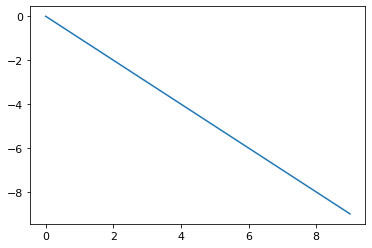

In [57]:
import ltspice
l = ltspice.Ltspice("circuito sencilloBRT2.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
plt.plot(tiempo, voltaje)

Al terminar el ejercicio la gráfica de arriba ojo que el eje Y no lo está numerando con los valores con decimales no se por que.

## 2.1 Análisis de circuito con resistencias en serie


In [42]:
%%writefile "resistencias en serieBRT.net"
* circuito con tres resistencias en serie
v1 0 1 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serieBRT.net


In [43]:
circuito_y_analisis2 = ahkab.netlist_parser.parse_circuit('resistencias en serieBRT.net')

In [44]:
circuito2 = circuito_y_analisis2[0]
analisis2 = circuito_y_analisis2[1]
lista_de_analisis2 = ahkab.netlist_parser.parse_analysis(circuito2, analisis2)
resultados2 = ahkab.run(circuito2, lista_de_analisis2)
print(resultados2['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serieBRT.net).
Run on 2021-01-05 12:26:29, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9       9e-12      0
V2          V        -1.5     1.5e-12    0
V3          V        -6.5     6.5e-12    0
I(V1)       A        -0.0005  0          0


Vamos a realizar los cálculos con Sympy

In [45]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

v1 = resultados2['op']['V1'][0][0] * volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad

v2 = symbols('i')
ley_ohm = Eq(v2,intensidad*r1)
solucion_v2 = solve(ley_ohm,v2)
v2 = convert_to(solucion_v2[0], [volts]).n(2)
v2


NameError: name 'kilo' is not defined

In [86]:



intensidad = -9 / ( 3000 + 10000 + 5000) 
print ( intensidad)
voltaje_consumido_V2 = intensidad * 3000
print(voltaje_consumido_V2)

voltaje_consumido_V3 = voltaje_consumido_V2 + intensidad * 10000
print(voltaje_consumido_V3)

voltaje_consumido_V1 = voltaje_consumido_V3 + intensidad * 5000
print(voltaje_consumido_V1)



-0.0005
-1.5
-6.5
-9.0


In [63]:
i = -0.0005
i = i*3000
print(i)

-1.5


Ahora pasamos a realizar los calculos en Sympy

In [25]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [77]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
print(intensidad_ahkab)
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-0.09*ampere


-270.0*volt

In [78]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)

0.0005*ampere

In [37]:

intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
v3= symbols('i')
ley_ohm = Eq(v3, intensidad*r2)
solucion_v3 = solve(ley_ohm, v3)
convert_to(solucion_v3[0], [volts]).n(2)


5.0*volt

In [34]:
V2= symbols('i')
ley_ohm = Eq(v2, intensidad*r1)
solucion_v2 = solve(ley_ohm, v2)
convert_to(solucion_v2[0], [volts]).n(2)

0.0005*ampere


1.5*volt

In [38]:
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
v3= symbols('i')
ley_ohm = Eq(v3, intensidad*r3)
solucion_v3 = solve(ley_ohm, v3)
convert_to(solucion_v3[0], [volts]).n(2)

2.5*volt

Se cumple la ley de kirchok ya que 9 = 1 + 1,5 + 2,5

### 2.3 ANALISIS .OP DE CIRCUITOS CON RESISTENCIAS EN PARALELO



In [61]:
%%writefile "resistencias en paralelo 1BRT.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end




Overwriting resistencias en paralelo 1BRT.cir


In [63]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1BRT.cir).
Run on 2020-12-28 22:30:27, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0



Analizamos los resultados, lo primero es calcular los mismos y comprobar. Si calculamos la resistencia es equivalente. 






In [156]:
rtotal = 1000 + 1 / (( 1 / (220 + 1500)) + ( 1/470))
print(rtotal)
intensidad = -12 / rtotal
print(intensidad)

v2 = -12 - (intensidad * 1000)
print( v2)

intensidadr1 = v2 / 470
intensidadr2 = v2 / (220+1500)

print (intensidadr1)
print (intensidadr2)

print (intensidadr1 + intensidadr2)

v3 = v2 - (intensidadr2* 220)

print (v3)


1369.132420091324
-0.008764674493062967
-3.2353255069370324
-0.006883671291355388
-0.0018810032017075769
-0.008764674493062966
-2.8215048025613654


In [171]:
%%writefile "resistencias en paralelo 1BRTDummy.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 31 3 220
r4 3 0 1.5k
r5 21 0 470
v1d 21 2 vdc=0 type=vdc
v2d 31 2 vdc=0 type=vdc
.op
.end

Overwriting resistencias en paralelo 1BRTDummy.cir


In [170]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1BRTdummy.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1BRTdummy.cir).
Run on 2020-12-31 14:50:36, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V31         V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
V21         V         -3.23533     3.23533e-12    0
I(VDD)      A         -0.00876467  0              0
I(V1D)      A          0.00688367  0              0
I(V2D)      A          0.001881    0              0


Los resultados son los mismos que los que había calculado y se cumple la ley de kirchoff para las corrientes.

In [ ]:
representamos el segundo circuito

In [248]:
%%writefile "resistencias en paralelo 2BRT.cir"
* resistencias en paralelo
v1 0 1 type=vdc vdc=9
r1 1 2 47
v3d 2 21 type=vdc vdc=0
r2 21 3 220
r4 3 4 1000
r5 4 0 560
r3 2 5 180
v2 0 5 type=vdc vdc=1.5
.op
.end



Overwriting resistencias en paralelo 2BRT.cir


In [249]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2BRT.cir).
Run on 2020-12-31 16:10:50, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           8.99998e-12    0
V2          V        -7.29441     7.29442e-12    0
V21         V        -7.29441     7.29441e-12    0
V3          V        -6.39285     6.39287e-12    0
V4          V        -2.29487     2.29487e-12    0
V5          V        -1.5         1.5e-12        0
I(V1)       A        -0.0362891   0              0
I(V3D)      A        -0.00409798  0              0
I(V2)       A         0.0321912   0              0


Analizamos el segundo circuito hay que calcular los voltajes a partir de las intensidades que si que nos da el circuito, los calculos deberían ser con sympi y con todas las unidades



In [271]:
v1 = 9 - (0.0362891 * 47)
print (v1)
v3 = v1 - (0.00409798 * 220)
print ( v3)
v4 =  v3 -(0.00409798 * 1000)
print (v4)













7.2944123
6.3928567
2.2948766999999997


In [272]:
%%writefile "resistencias en paralelo 3BRT.cir"
* resistencias en paralelo
v0 0 1 type=vdc vdc=9
v1 1 2 type=vdc vdc=0
r1 2 0 10k
v2 1 3 type=vdc vdc=0
r2 3 0 2k
v3 1 4 type=vdc vdc=0
r2 4 0 1k
.op
.end

Overwriting resistencias en paralelo 3BRT.cir


In [273]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3BRT.cir).
Run on 2020-12-31 16:37:39, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V0)       A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0


In [275]:

rtotal =  1 / (( 1 / (10000)) + ( 1/2000)+ ( 1/1000))
intensidad = 9 / rtotal 
print (intensidad)


0.0144


### 2.3 CIRCUITOS EN CORRIENTE CONTINUA QUE EVOLUCIONAN CON EL TIEMPO



In [277]:
%%writefile "condensador en continuaBRT.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Writing condensador en continuaBRT.ckt


OJO QUE ESTE TEXTO ESTA COPIADO TAL CUAL

EL comando .tran realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo tfinal. y en intervalos tstep. Si empleamos un varlor distinto para parámetro uic, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente ic=X en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).

ic = 0 es la carga inicial del condensador?



In [283]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continuaBRT.ckt")
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"



In [284]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
print(resultados['tran'].keys())


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continuaBRT.ckt).
Run on 2020-12-31 16:49:46, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0
['T', 'V1', 'V2', 'I(V1)']


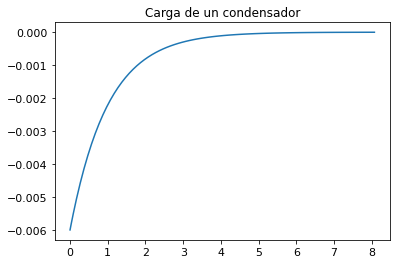

In [286]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

la intensidad va bajando hasta que el condensador queda totalmente cargado. El voltaje a medida que evoluciona el circuito en el tiempo tiende a 0. 





In [287]:
intensidad = 6/1000
print (intensidad)


0.006
